In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir Data
!cp "/content/drive/MyDrive/DL_LAB/ASG3/heart.csv" "./Data"
!cp "/content/drive/MyDrive/DL_LAB/ASG3/Mobile_price.csv" "./Data"
!cp "/content/drive/MyDrive/DL_LAB/ASG1/50_Startups.csv" "./Data"

mkdir: cannot create directory ‘Data’: File exists


Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [ ]:
heart_df=pd.read_csv('./Data/heart.csv')
mobile_df=pd.read_csv('./Data/Mobile_price.csv')
startups_df=pd.read_csv('./Data/50_Startups.csv')

In [ ]:
startups_df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**1. Implement ANN model for classification where you classify between chance of heart attack or not.
You will use first 13 attributes to as input the network and later try to implement the model with several layers and output layer will comprise of 2 neurons so model reduce from 13 to 2 with few hidden layers.**

In [ ]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# dividing data into train set and test set
train_data1, test_data1 = train_test_split(heart_df, test_size=0.2, random_state=25)


In [ ]:
# Seperating Features and Target values
x_train1, y_train1 = train_data1.drop('target', axis=1), train_data1['target']
x_test1, y_test1 = test_data1.drop('target', axis=1), test_data1['target']


In [ ]:
#one hot encoding on target values based on no of class
ohe = OneHotEncoder()

y_train1=np.array(y_train1).reshape(-1,1)
y_train1 = ohe.fit_transform(y_train1).toarray()

y_test1=np.array(y_test1).reshape(-1,1)
y_test1 = ohe.fit_transform(y_test1).toarray()

In [ ]:
y_test1

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [ ]:
#function to normalize the data

def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

In [ ]:
# normalizing the Features of trainset and testset
x_train_scaled_all1, x_test_scaled_all1 = scale_datasets(x_train1, x_test1)

In [ ]:
# Dividing scalled train data into train and validation data

X_train_scaled1, X_val_scaled1, Y_train1, Y_val1 = train_test_split(x_train_scaled_all1, y_train1, test_size=0.20, random_state=40)
print(X_train_scaled1.shape)
print(Y_train1.shape)
print(X_val_scaled1.shape)
#validation data is not test data...
#validation data is to check whether during training whether our training is happening successfully or not

(193, 13)
(193, 2)
(49, 13)


In [ ]:
# Defining model for classification
model1 = Sequential()
model1.add(Dense(activation = "relu", input_dim = 13, 
                     units = 10, kernel_initializer = "uniform"))
model1.add(Dense(activation = "relu", units = 9, 
                     kernel_initializer = "uniform"))
model1.add(Dense(activation = "sigmoid", units = 2, 
                     kernel_initializer = "uniform"))
model1.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                140       
                                                                 
 dense_7 (Dense)             (None, 9)                 99        
                                                                 
 dense_8 (Dense)             (None, 2)                 20        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(X_train_scaled1 , Y_train1 , batch_size = 8 ,epochs = 200 )


Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5596
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.6425
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.7824
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.8290
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.8497
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.8601
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8705
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8860
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8808
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8808
Epoch 11/

In [ ]:
# prediction on scalled train data
pred_train1= model1.predict(X_train_scaled1)
scores = model1.evaluate(X_train_scaled1, Y_train1, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1]*100, (1 - scores[1])*100))   
 

Accuracy on training data: 96.37305736541748% 
Error on training data: 3.6269426345825195


In [ ]:
# prediction on scalled test data
pred_test1= model1.predict(x_test_scaled_all1)

scores1 = model1.evaluate(x_test_scaled_all1, y_test1, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores1[1]*100, (1 - scores1[1])*100))    

Accuracy on test data: 78.68852615356445% 
Error on test data: 21.311473846435547


In [ ]:
#Converting predictions to label(reversing onehot encoding operation)
pred1 = list()
for i in range(len(pred_test1)):
    pred1.append(np.argmax(pred_test1[i])) # returns index of maximum value

In [ ]:
#Converting predictions to label(reversing onehot encoding operation) 
test1 = list()
for i in range(len(y_test1)):
    test1.append(np.argmax(y_test1[i])) # returns index of maximum value


In [ ]:
#comparing test and prediction
pd.DataFrame({'Test':test1,'Pred':pred1}).head(20)

,Test,Pred
0,0,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,1
6,0,1
7,0,0
8,1,1
9,1,1


**2. Implement ANN Model for multi-classification where you will classify mobiles into various price range based on multiple features. You have to train the network for all total 20 attributes.**

In [ ]:
mobile_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
uniqueValues = mobile_df['price_range'].unique()
uniqueValues

array([1, 2, 3, 0])

In [ ]:
# dividing data into train set and test set
train_data2, test_data2 = train_test_split(mobile_df, test_size=0.2, random_state=25)

In [ ]:
# spliting original data into trainset and test set
x_train2, y_train2 = train_data2.drop('price_range', axis=1), train_data2['price_range']
x_test2, y_test2 = test_data2.drop('price_range', axis=1), test_data2['price_range']


In [ ]:
#one hot encoding on target values based on no of class
ohe = OneHotEncoder()

y_train2=np.array(y_train2).reshape(-1,1)
y_train2 = ohe.fit_transform(y_train2).toarray()

y_test2=np.array(y_test2).reshape(-1,1)
y_test2 = ohe.fit_transform(y_test2).toarray()

In [ ]:
#function to normalize the data

def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

In [ ]:
# normalizing the original data
x_train_scaled_all2, x_test_scaled_all2 = scale_datasets(x_train2, x_test2)

In [ ]:
# Dividing scalled train data into train and validation data

X_train_scaled2, X_val_scaled2, Y_train2, Y_val2 = train_test_split(x_train_scaled_all2, y_train2, test_size=0.20, random_state=40)
print(X_train_scaled2.shape)
print(Y_train2.shape)
print(X_val_scaled2.shape)
#validation data is not test data...
#validation data is to check whether during training whether our training is happening successfully or not

(1280, 20)
(1280, 4)
(320, 20)


In [ ]:
model2 = Sequential()
model2.add(Dense(activation = "relu", input_dim = 20, 
                     units = 40, kernel_initializer = "uniform"))
model2.add(Dense(activation = "relu", units = 20, 
                     kernel_initializer = "uniform"))
model2.add(Dense(activation = "softmax", units = 4, 
                     kernel_initializer = "uniform"))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                840       
                                                                 
 dense_4 (Dense)             (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 4)                 84        
                                                                 
Total params: 1,744
Trainable params: 1,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_train_scaled2 , Y_train2 , batch_size = 8 ,epochs = 200 )


Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 1.2363 - accuracy: 0.4430
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7570
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.9266
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9516
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9656
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9695
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9672
Epoch 8/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9750
Epoch 9/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9781
Epoch 10/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0739 - accura

In [ ]:
pred_train2= model2.predict(X_train_scaled2)
scores2 = model2.evaluate(X_train_scaled2, Y_train2, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores2[1]*100, (1 - scores2[1])*100))   
 

Accuracy on training data: 100.0% 
Error on training data: 0.0


In [ ]:
pred_test2= model2.predict(x_test_scaled_all2)
scores2 = model2.evaluate(x_test_scaled_all2, y_test2, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores2[1]*100, (1 - scores2[1])*100))    

Accuracy on test data: 93.50000023841858% 
Error on test data: 6.499999761581421


In [ ]:
#Converting predictions to label
pred2 = list()
for i in range(len(pred_test2)):
    pred2.append(np.argmax(pred_test2[i])) # returns index of maximum value



In [ ]:
#Converting predictions to label
test2 = list()
for i in range(len(y_test2)):
    test2.append(np.argmax(y_test2[i])) # returns index of maximum value


In [ ]:
#comparing test and prediction
pd.DataFrame({'Test':test2,'Pred':pred2}).head(20)

,Test,Pred
0,1,1
1,1,1
2,3,3
3,0,0
4,1,1
5,1,1
6,0,0
7,2,2
8,0,0
9,3,3


**3.Implement ANN model for regression to predict battery power based on other mobile features.**

In [ ]:
mobile_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# dividing data into train set and test set
train_data, test_data = train_test_split(mobile_df, test_size=0.2, random_state=25)


In [ ]:
#function to normalize the data
def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

In [ ]:
x_train, y_train = train_data.drop('battery_power', axis=1), train_data['battery_power']
x_test, y_test = test_data.drop('battery_power', axis=1), test_data['battery_power']

In [ ]:
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [ ]:
# Dividing scalled train data into train and validation data

X_train, X_val, Y_train, Y_val = train_test_split(x_train_scaled, y_train, test_size=0.20, random_state=40)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
#validation data is not test data...
#validation data is to check whether during training whether our training is happening successfully or not

(1280, 20)
(1280,)
(320, 20)


In [ ]:
hidden_units1 = 200
hidden_units2 = 150
hidden_units3 = 150
# Creating model using the Sequential in tensorflow
#Sequential() meaning each layer will be added one after another
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, input_dim=20, kernel_initializer='normal'),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal',activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()



In [ ]:
#r2

model.compile(
    loss=MeanSquaredLogarithmicError(), 
    optimizer=SGD(learning_rate = 0.001), 
    metrics=[MeanSquaredLogarithmicError()]
)

In [ ]:
# train the model
history = model.fit(
    X_train, 
    Y_train, 
    epochs=200, 
    batch_size=128,
    validation_data = (X_val,Y_val)
)

Epoch 1/200
10/10 [==============================] - 1s 24ms/step - loss: 49.6230 - mean_squared_logarithmic_error: 49.6230 - val_loss: 49.6976 - val_mean_squared_logarithmic_error: 49.8199
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 47.8504 - mean_squared_logarithmic_error: 47.8504 - val_loss: 47.7235 - val_mean_squared_logarithmic_error: 47.8426
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 46.1170 - mean_squared_logarithmic_error: 46.1170 - val_loss: 46.1985 - val_mean_squared_logarithmic_error: 46.3150
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 44.7321 - mean_squared_logarithmic_error: 44.7321 - val_loss: 44.9323 - val_mean_squared_logarithmic_error: 45.0464
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 43.5576 - mean_squared_logarithmic_error: 43.5576 - val_loss: 43.8312 - val_mean_squared_logarithmic_error: 43.9433
Epoch 6/200
10/10 [==============================] - 0

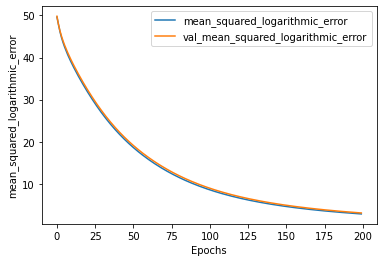

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
predictions3 = model.predict(x_test)


In [ ]:
y_test=np.array(y_test).reshape(-1,1)


In [ ]:
scores2 = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores2[1]*100, (1 - scores2[1])*100))    

Accuracy on test data: 12248490.625% 
Error on test data: -12248390.625


In [ ]:
#Converting predictions to label
test3 = list()
for i in range(len(y_test)):
    test3.append(y_test[i]) # returns index of maximum value


In [ ]:
#Converting predictions to label
pred3 = list()
for i in range(len(predictions3)):
    pred3.append(predictions3[i]) # returns index of maximum value


In [ ]:
#comparing test and prediction
pd.DataFrame({'Test':test3,'Pred':pred3}).head(50)

,Test,Pred
0,[718],[1681.0208]
1,[936],[1956.8373]
2,[1521],[3371.0774]
3,[763],[1252.6022]
4,[659],[2022.0675]
5,[1176],[1671.6638]
6,[981],[1439.8887]
7,[1647],[2394.8645]
8,[595],[1547.2317]
9,[1312],[3509.6147]


**4.Predict the profit values on 50_startups dataset for each company using ANN model.**

In [ ]:
startups_df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
# dividing data into train set and test set
train_data4 ,test_data4 = train_test_split(startups_df, test_size=0.2, random_state=25)


In [ ]:
#function to normalize the data
def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()

  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
  x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
  
  return x_train_scaled, x_test_scaled

In [ ]:
x_train4, y_train4 = train_data4.drop(['Profit','State'], axis = 1), train_data4['Profit']
x_test4, y_test4 = test_data4.drop(['Profit','State'],axis=1), test_data4['Profit']

In [ ]:
x_train_scaled_all4, x_test_scaled_all4= scale_datasets(x_train4, x_test4)

In [ ]:
# Dividing scalled train data into train and validation data

X_train4, X_val4, Y_train4, Y_val4 = train_test_split(x_train_scaled_all4, y_train4, test_size=0.20, random_state=40)
print(X_train4.shape)
print(Y_train4.shape)
print(X_val4.shape)
#validation data is not test data...
#validation data is to check whether during training whether our training is happening successfully or not

(32, 3)
(32,)
(8, 3)


In [ ]:
hidden_units1 = 100
hidden_units2 = 80
hidden_units3 = 70
learning_rate = 0.0001
# Creating model using the Sequential in tensorflow
#Sequential() meaning each layer will be added one after another
def build_model_using_sequential():
  model4 = Sequential([
    Dense(hidden_units1, input_dim=3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    #Dropout(0.2),

    Dense(1, kernel_initializer='normal',activation='linear')
  ])
  return model4
# build the model
model4 = build_model_using_sequential()



In [ ]:
# loss function
mse = MeanSquaredLogarithmicError()
model4.compile(
    loss=mse, 
    optimizer=SGD(learning_rate = learning_rate), 
    metrics=[mse]
)

In [ ]:
# train the model
history = model4.fit(
    X_train4, 
    Y_train4, 
    epochs=200, 
    batch_size=16,
    validation_data = (X_val4,Y_val4)
)

Epoch 1/200
2/2 [==============================] - 1s 178ms/step - loss: 132.9253 - mean_squared_logarithmic_error: 132.9253 - val_loss: 138.7764 - val_mean_squared_logarithmic_error: 138.7764
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 132.9266 - mean_squared_logarithmic_error: 132.9266 - val_loss: 138.7764 - val_mean_squared_logarithmic_error: 138.7764
Epoch 3/200
2/2 [==============================] - 0s 25ms/step - loss: 132.9262 - mean_squared_logarithmic_error: 132.9262 - val_loss: 138.7764 - val_mean_squared_logarithmic_error: 138.7764
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 132.9263 - mean_squared_logarithmic_error: 132.9263 - val_loss: 138.7764 - val_mean_squared_logarithmic_error: 138.7764
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 132.9254 - mean_squared_logarithmic_error: 132.9254 - val_loss: 138.7764 - val_mean_squared_logarithmic_error: 138.7764
Epoch 6/200
2/2 [======================

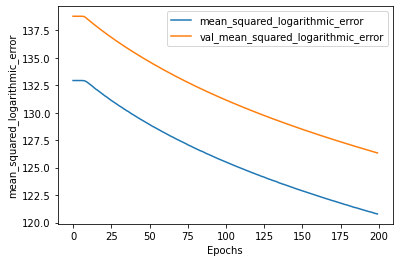

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

**5.Initially you can try with only 2-3 layers ANN model and later try with around 30 layers to see its effect on performance.**

In [ ]:
# Defining model for classification
model5 = Sequential()
model5.add(Dense(activation = "relu", input_dim = 13, units = 10, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "relu", units = 9, kernel_initializer = "uniform"))
model5.add(Dense(activation = "softmax", units = 2, kernel_initializer = "uniform"))
model5.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
model5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 10)                140       
                                                                 
 dense_45 (Dense)            (None, 9)                 99        
                                                                 
 dense_46 (Dense)            (None, 9)                 90        
                                                                 
 dense_47 (Dense)            (None, 9)                 90        
                                                                 
 dense_48 (Dense)            (None, 9)                 90        
                                                                 
 dense_49 (Dense)            (None, 9)                 90        
                                                                 
 dense_50 (Dense)            (None, 9)               

In [ ]:
model5.fit(X_train_scaled1 , Y_train1 , batch_size = 8 ,epochs = 200 )

Epoch 1/200
25/25 [==============================] - 2s 4ms/step - loss: 0.6925 - accuracy: 0.5492
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5596
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5596
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5596
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5596
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5596
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6885 - accuracy: 0.5596
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5596
Epoch 9/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5596
Epoch 10/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5596
Epoch 11/

In [ ]:
# prediction on scalled train data
pred_train1= model5.predict(X_train_scaled1)
scores = model5.evaluate(X_train_scaled1, Y_train1, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1]*100, (1 - scores[1])*100))   
 

Accuracy on training data: 55.95855116844177% 
Error on training data: 44.04144883155823


In [ ]:
# prediction on scalled test data
pred_test1= model1.predict(x_test_scaled_all1)

scores1 = model1.evaluate(x_test_scaled_all1, y_test1, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores1[1]*100, (1 - scores1[1])*100))    

Accuracy on test data: 57.37704634666443% 
Error on test data: 42.62295365333557


In [ ]:
#Converting predictions to label(reversing onehot encoding operation)
pred1 = list()
for i in range(len(pred_test1)):
    pred1.append(np.argmax(pred_test1[i])) # returns index of maximum value

In [ ]:
#Converting predictions to label(reversing onehot encoding operation) 
test1 = list()
for i in range(len(y_test1)):
    test1.append(np.argmax(y_test1[i])) # returns index of maximum value


In [ ]:
#comparing test and prediction
pd.DataFrame({'Test':test1,'Pred':pred1}).head(20)

,Test,Pred
0,0,1
1,1,0
2,1,0
3,0,1
4,1,1
5,1,0
6,0,1
7,0,1
8,1,0
9,1,1
